In [1]:
# Importing necessary libraries for Data Analysis and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/restaurant-reviews/Restaurant_Reviews.tsv', sep='\t')

In [3]:
# Print the first 5 rows of the 'messages' DataFrame
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# Generate summary statistics for the 'messages'
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df.groupby('Liked').describe()

Review                                    
       count unique                     top freq
Liked                                           
0        500    497  The food was terrible.    2
1        500    499      I love this place.    2

In [7]:
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [8]:
df.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [9]:
df_149 =df[df['Length'] == 149]['Review']


for message in df_149:
    print(message)


The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).


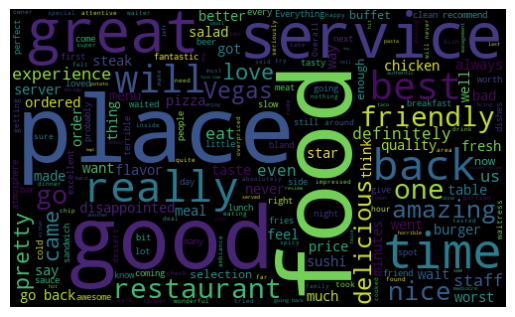

In [10]:
from wordcloud import WordCloud

# Combine all messages into a single string
all_messages = ' '.join(df['Review'])

# Create a WordCloud object with the desired settings
wordCloud = WordCloud(width=500, height=300, random_state=20, max_font_size=100).generate(all_messages)

# Display the WordCloud image
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

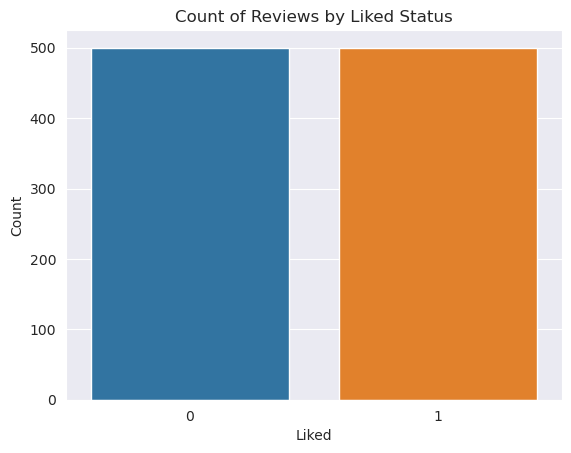

In [11]:
sns.set_style('darkgrid')

sns.countplot(x='Liked', data=df)

plt.title('Count of Reviews by Liked Status')

plt.xlabel('Liked')

plt.ylabel('Count')

plt.show()


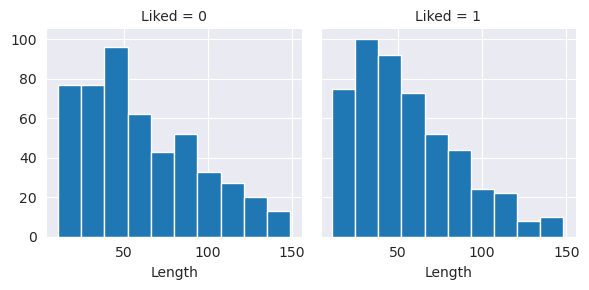

In [12]:

g = sns.FacetGrid(df, col='Liked')

g.map(plt.hist, 'Length');

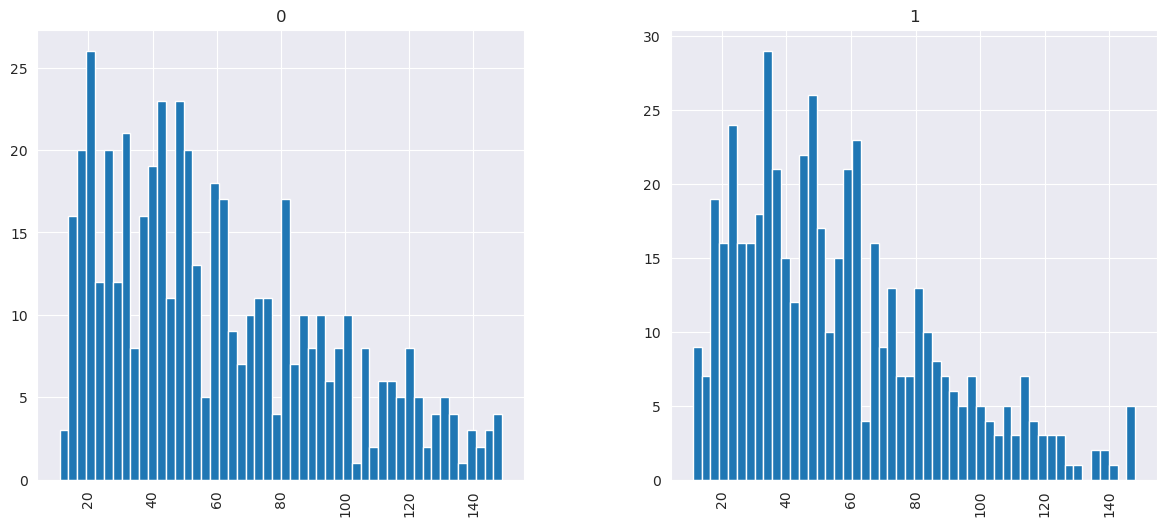

In [13]:
df.hist(column='Length', by='Liked', bins=50,figsize=(14,6));

In [14]:
df.corr()

,Liked,Length
Liked,1.000000,-0.075285
Length,-0.075285,1.000000


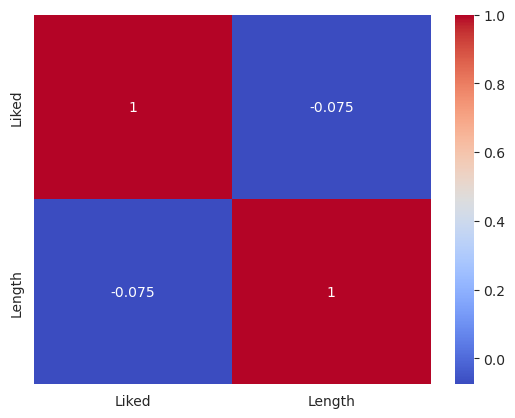

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv = CountVectorizer()

In [18]:

X =df['Review'].str.lower()
y = df['Liked']

In [19]:
X = cv.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [22]:
nb.fit(X_train,y_train)

MultinomialNB()

In [23]:
predictions = nb.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
print(confusion_matrix(y_test,predictions))

[[115  35]
 [ 30 120]]


In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       150
           1       0.77      0.80      0.79       150

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

In [28]:
from sklearn.pipeline import Pipeline

In [29]:

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),])  # train on TF-IDF vectors, Naive Bayes classifier


In [30]:
X = df['Review']
y = df['Liked']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [31]:

pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [32]:
predictions = pipeline.predict(X_test)

In [33]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[111  39]
 [ 23 127]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       150
           1       0.77      0.85      0.80       150

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



In [34]:

from sklearn import linear_model

In [35]:
logr=linear_model.LogisticRegression()

In [36]:
X = cv.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [38]:
logr.fit(X_train,y_train)

LogisticRegression()

In [39]:
# Use the trained logistic regression model to make predictions on the test set
logpredictions = logr.predict(X_test)

In [40]:

print(confusion_matrix(y_test,logpredictions))

[[119  31]
 [ 21 129]]


In [41]:
print(classification_report(y_test,logpredictions))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       150
           1       0.81      0.86      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

